In [37]:
import sys
sys.path.insert(0,'..')
from src.data.create_stochastic_block_model import create_louvain_communities_dict,store_in_file,create_graph_and_node_mappings_from_file
from src.data.data_loader import GraphDataset
from torch_geometric.utils import to_networkx
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from src.data.create_stochastic_block_model import calculate_edge_probabilities,create_community_id_to_node_id

In [45]:
datasets = 'cora citeseer pubmed cora_full twitter webkb'.split()

In [46]:
formal_name = {'cora':'CORA-ML', 'citeseer':'CiteSeer' ,'pubmed':'PubMed', 'cora_full':'CORA-Full',
              'cornell':'Cornell', 'texas':'Texas', 'washington':'Washington',  'wisconsin':'Wisconsin',
              'twitter':'Twitter', 'webkb':'WebKB'}

In [47]:
def load_labels(path):
    label = {}
    cnt = 0
    label_mapping = {}
    reverse_label_mapping = {}
    with open(path, 'r') as handle:
        label = {}
        for line in handle:
            s = line.strip().split()
            if s[-1] not in label_mapping:
                label_mapping[s[-1]] = cnt
                reverse_label_mapping[cnt] = s[-1]
                cnt+=1
            label[s[0]] = label_mapping[s[-1]]
    return label,reverse_label_mapping

def label_stochastic_matric(graph_path, content_path):
    graph, node_mappings, reverse_node_mappings = create_graph_and_node_mappings_from_file(graph_path)
    labels,remap = load_labels(content_path)
    node_labels = {}
    for node in labels:
        node_labels[node_mappings[node]] = labels[node]
    label_id_to_node_id = create_community_id_to_node_id(node_labels)
    edge_probabilities = calculate_edge_probabilities(graph, label_id_to_node_id,
                                                      node_labels, None)
    return edge_probabilities,remap

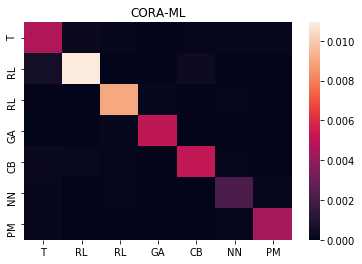

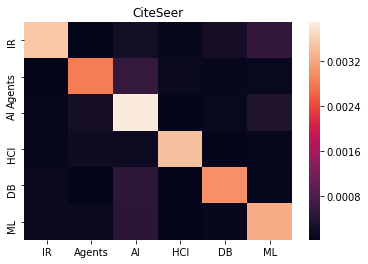

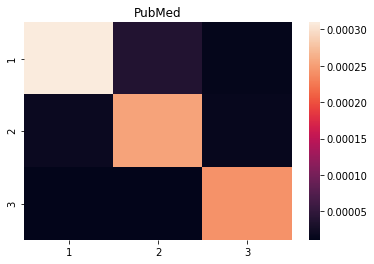

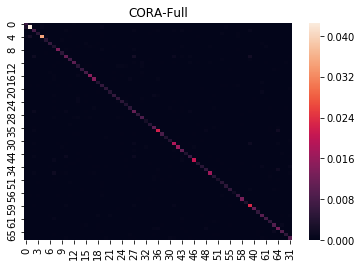

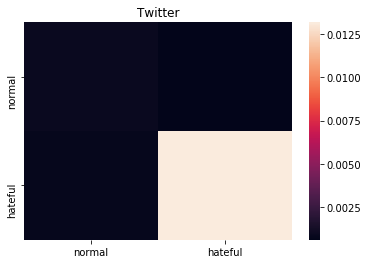

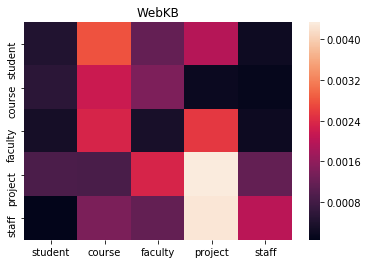

In [54]:
for dataset_name in datasets:
    mtx,remap = label_stochastic_matric(f'../data/graphs/processed/{dataset_name}/{dataset_name}.cites',
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.content')
#     print(pd.DataFrame(mtx).rename(columns=remap,index=remap))
#     break
    plt.figure()
    hm = pd.DataFrame(mtx).rename(columns=remap,index=remap)
    if dataset_name == 'cora':
        hm = hm.rename(columns=lambda x : ''.join([c for c in x if c.isupper()]),
                      index=lambda x : ''.join([c for c in x if c.isupper()]))
    sns.heatmap(hm)
    plt.title(formal_name[dataset_name])
#     plt.xlabel(remap)
#     plt.xticks(list(remap.keys()),list(remap.values()),rotation = 60) # , rotation_mode="anchor"
#     plt.yticks(list(remap.keys()),list(remap.values()),rotation = 0)
    plt.savefig(f'../reports/figures/label_transition/{dataset_name}.pdf',bbox_inches='tight')
